In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [19]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,e661523a82ede4,a4796ea2c676d2,684cc8df5cc4dd,0,2,23.14,0,0,1,50,...,0,0.0,0,0.0,0,0,2429.00,3,1533,0.7500
1,df3de6d63dfe0a,178e12299fa704,18d5b849517014,0,3,206.80,1,1,3,16,...,3,0.0,0,0.0,0,0,2172.00,9,1494,0.8571
2,27f4b5a94c5b6c,292e9c226d91e8,7034cd73212dce,0,0,100.00,1,0,0,36,...,0,0.0,0,0.0,0,0,133.90,2,0,0.3125
3,050d1211fb024d,0946f20056ef76,8f0483fc79c4fd,0,0,49.02,0,0,0,84,...,0,0.0,0,0.0,0,0,111.00,1,0,0.1034
4,ce15d0aa826ae7,8058badb744523,a008a6419c2d47,0,0,15.60,0,0,0,86,...,0,0.0,0,0.0,0,0,93.94,2,1489,0.1429


In [20]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9480 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 21.


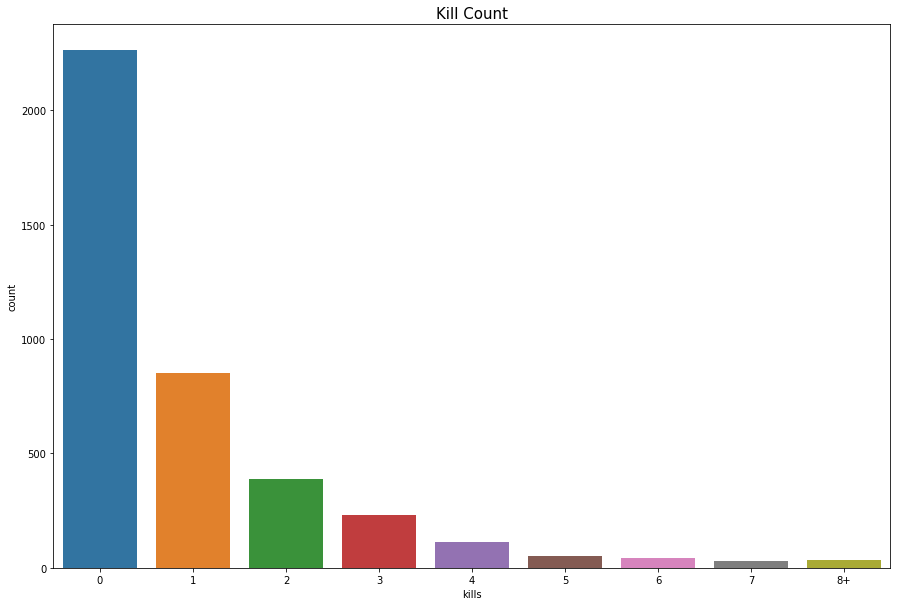

In [21]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

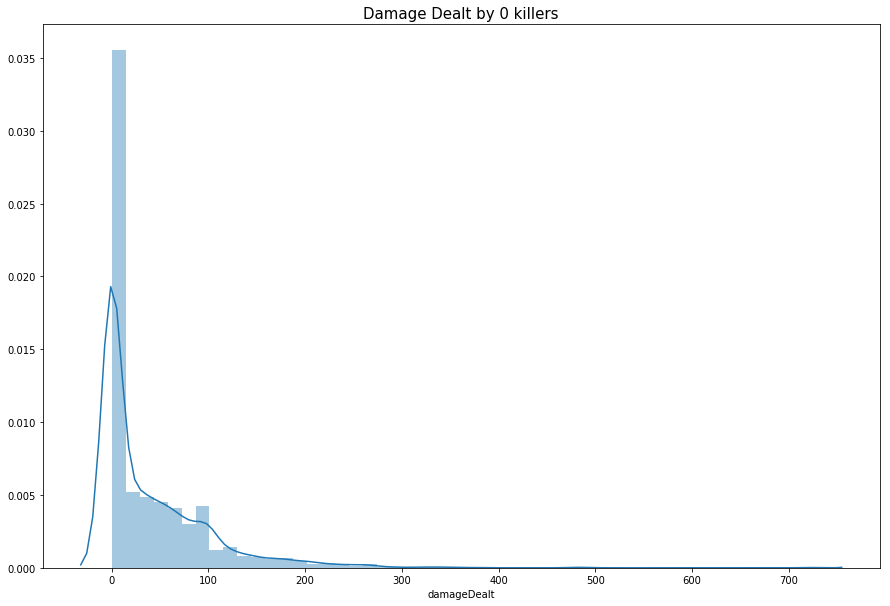

In [22]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [23]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

20 players (0.0000%) have won without a single kill!
4 players (0.0000%) have won without dealing damage!


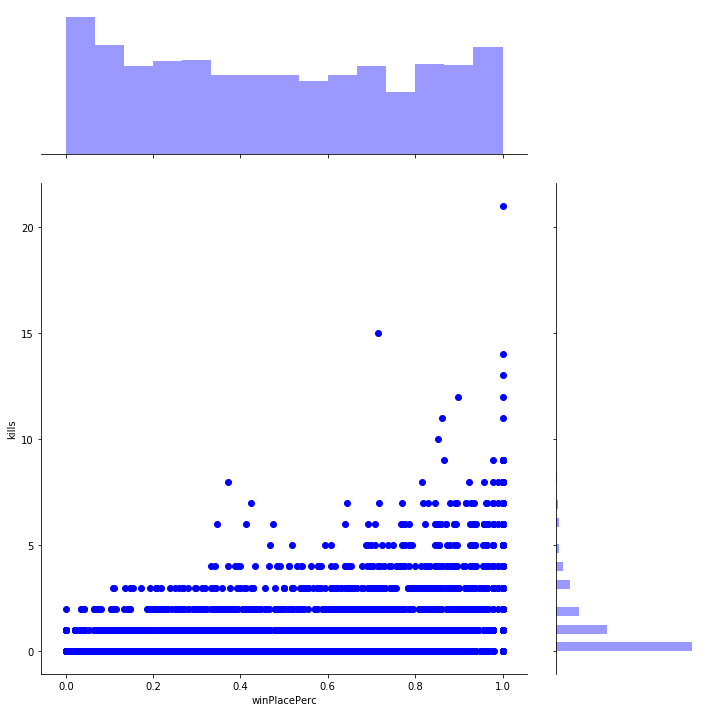

In [25]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="b")
plt.show()

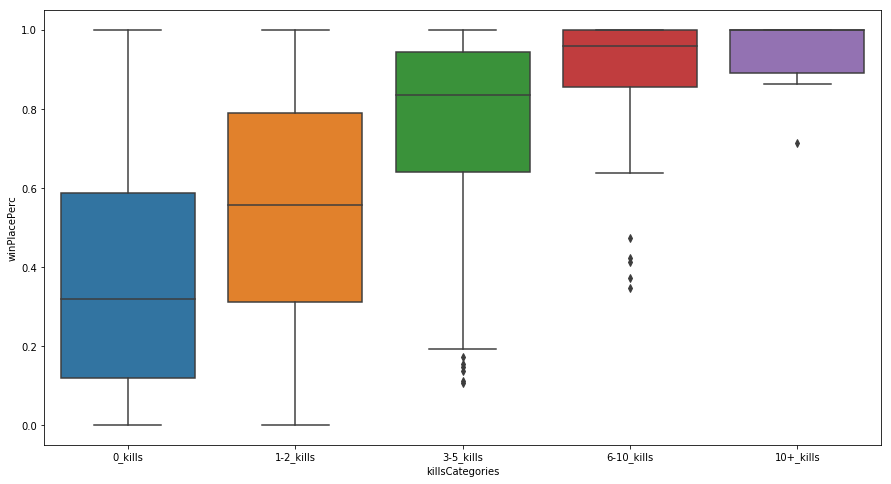

In [26]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [27]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1146.3m, 99% of people have walked 4250.06m or less, while the marathoner champion walked for 9325.0m.


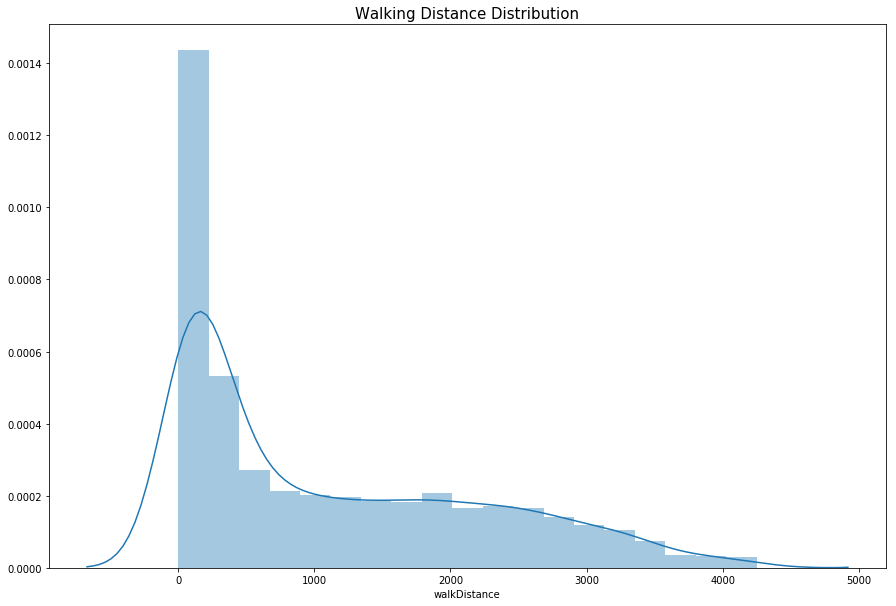

In [28]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [29]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

85 players (1.0000%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


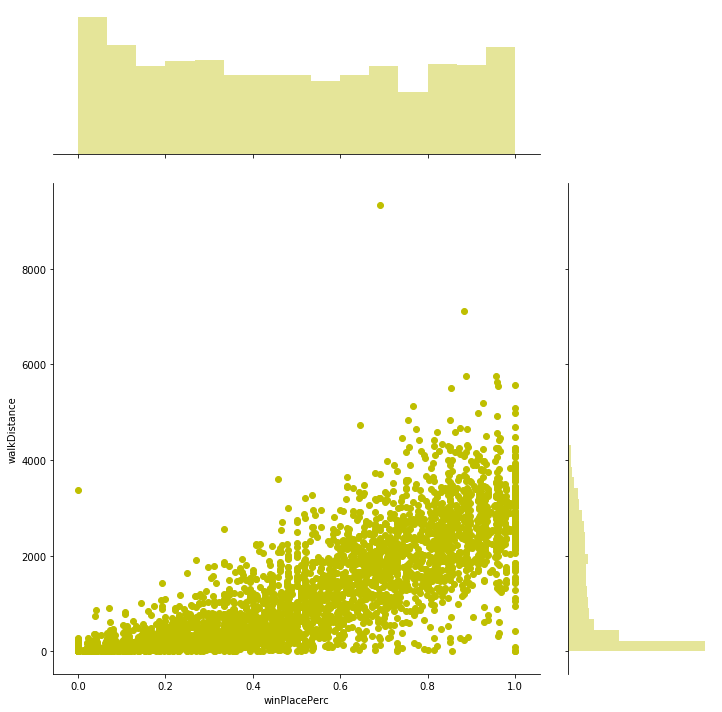

In [30]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="y")
plt.show()

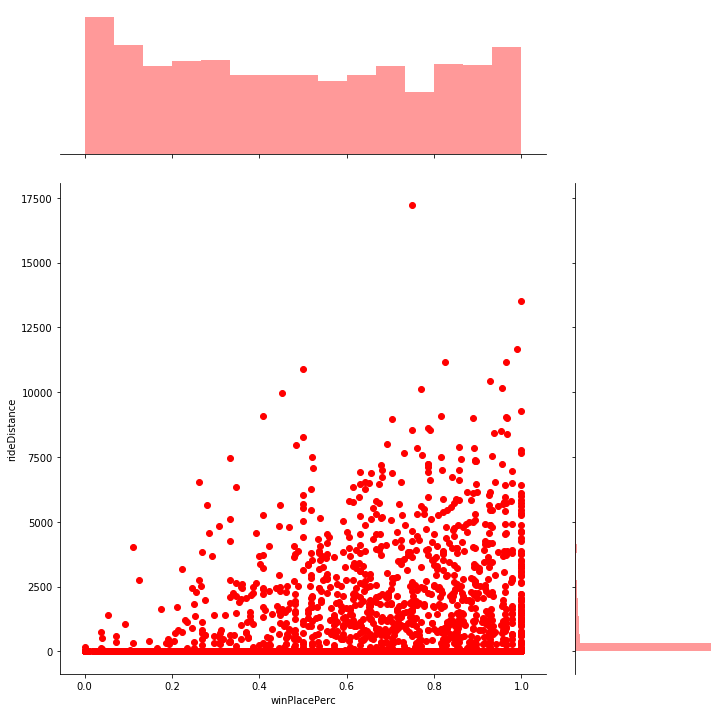

In [31]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="r")
plt.show()

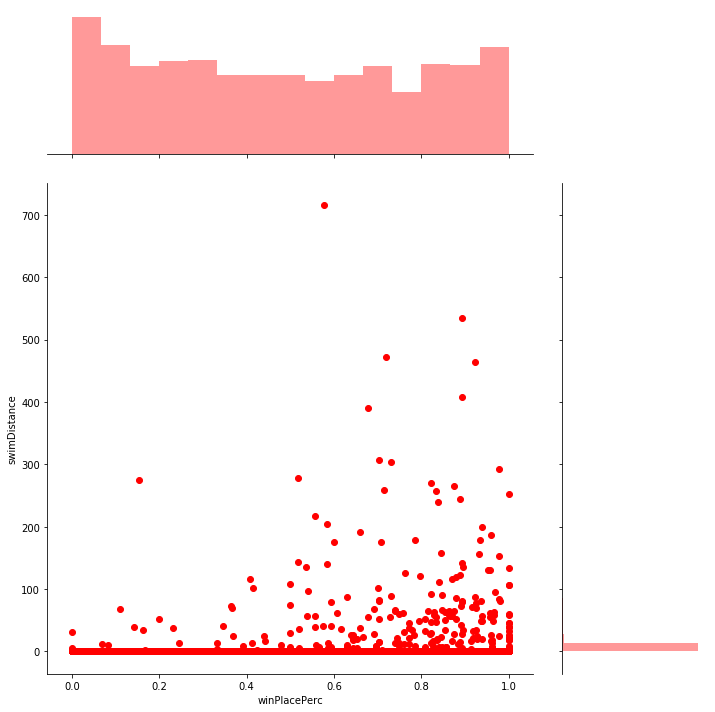

In [32]:
sns.jointplot(x="winPlacePerc", y="swimDistance", data=train, height=10, ratio=3, color="r")
plt.show()

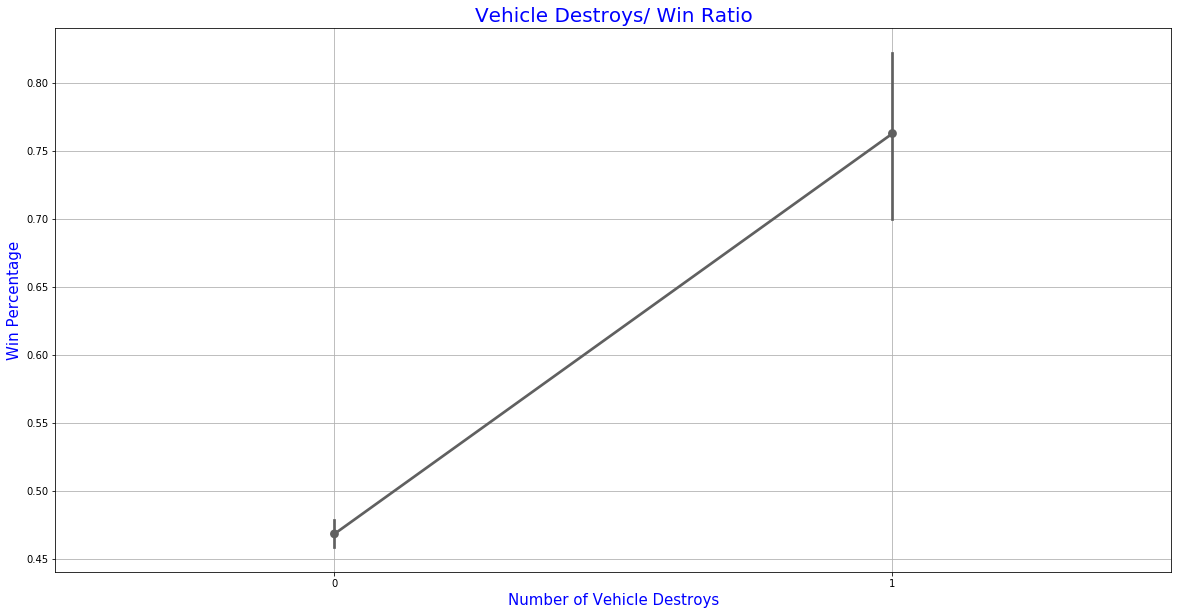

In [33]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

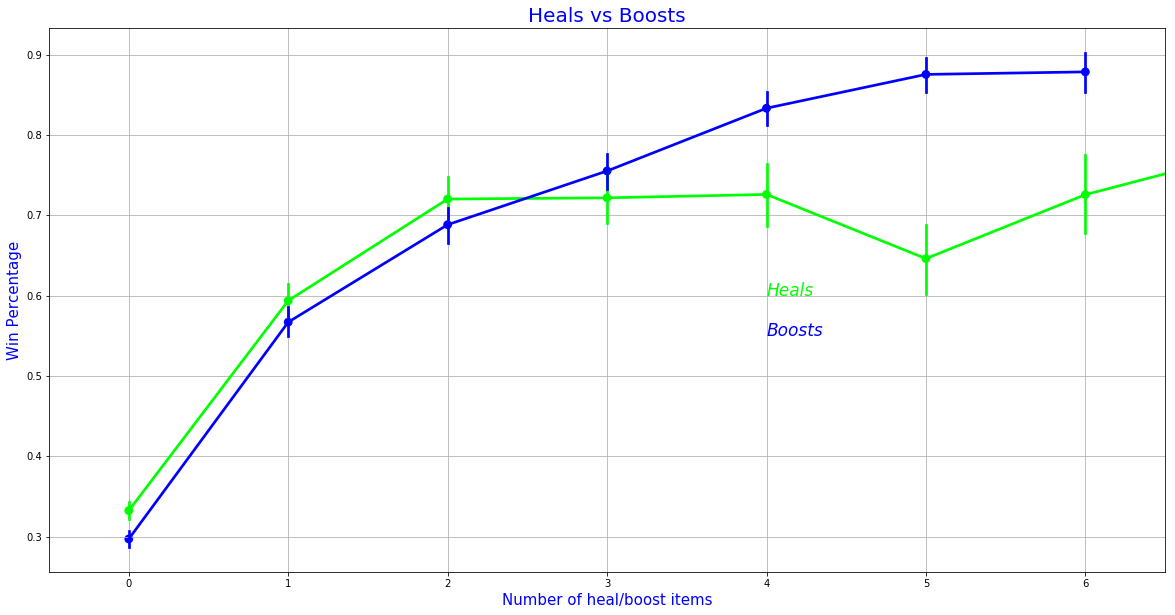

In [34]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

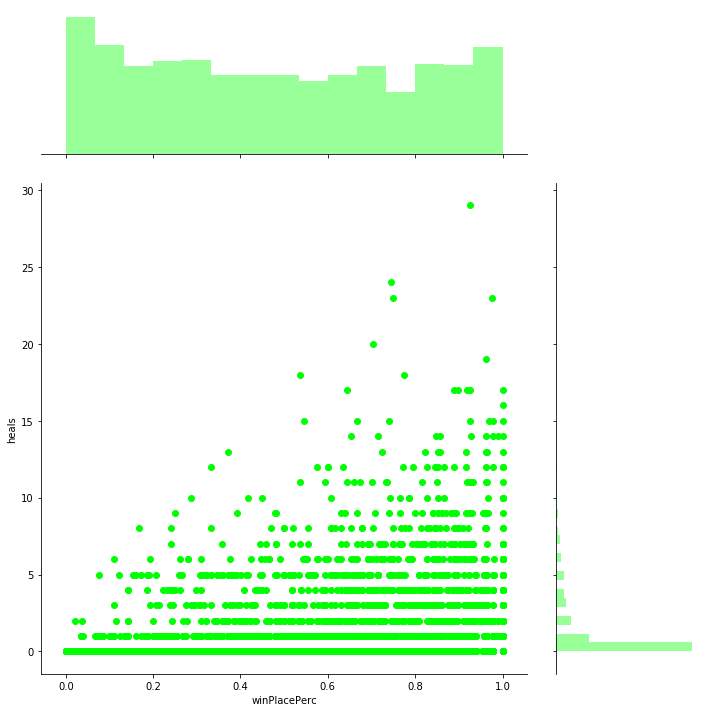

In [35]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

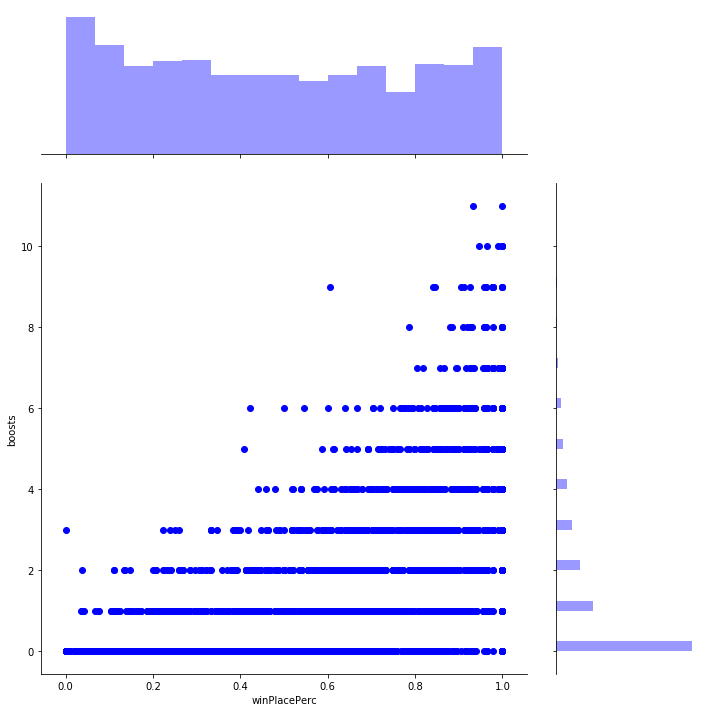

In [36]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

In [37]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.02 or less, while the doctor used 29.
The average person uses 1.2 boost items, 99% of people use 8.0 or less, while the doctor used 11.


In [39]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 649 (16.00%) solo games, 2967 (74.00%) duo games and 383 (9.00%) squad games.


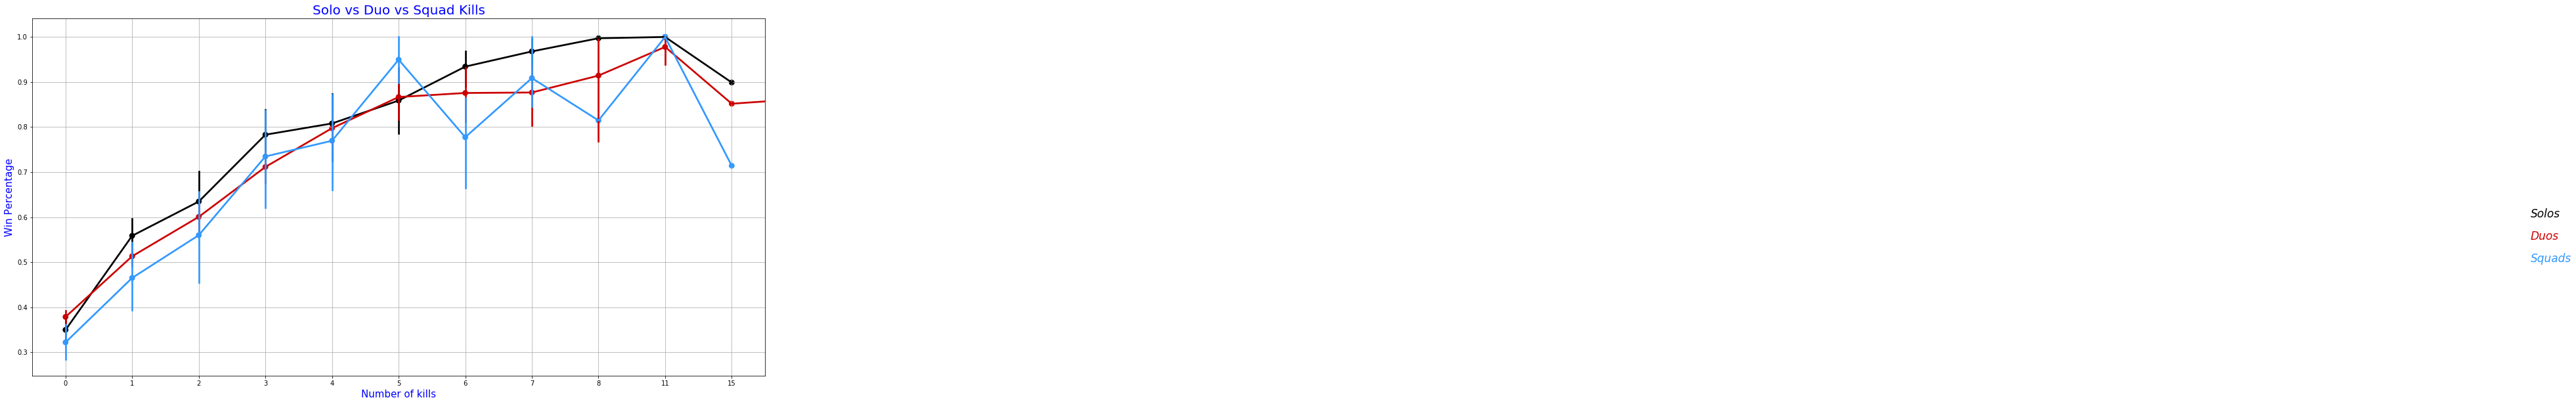

In [40]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

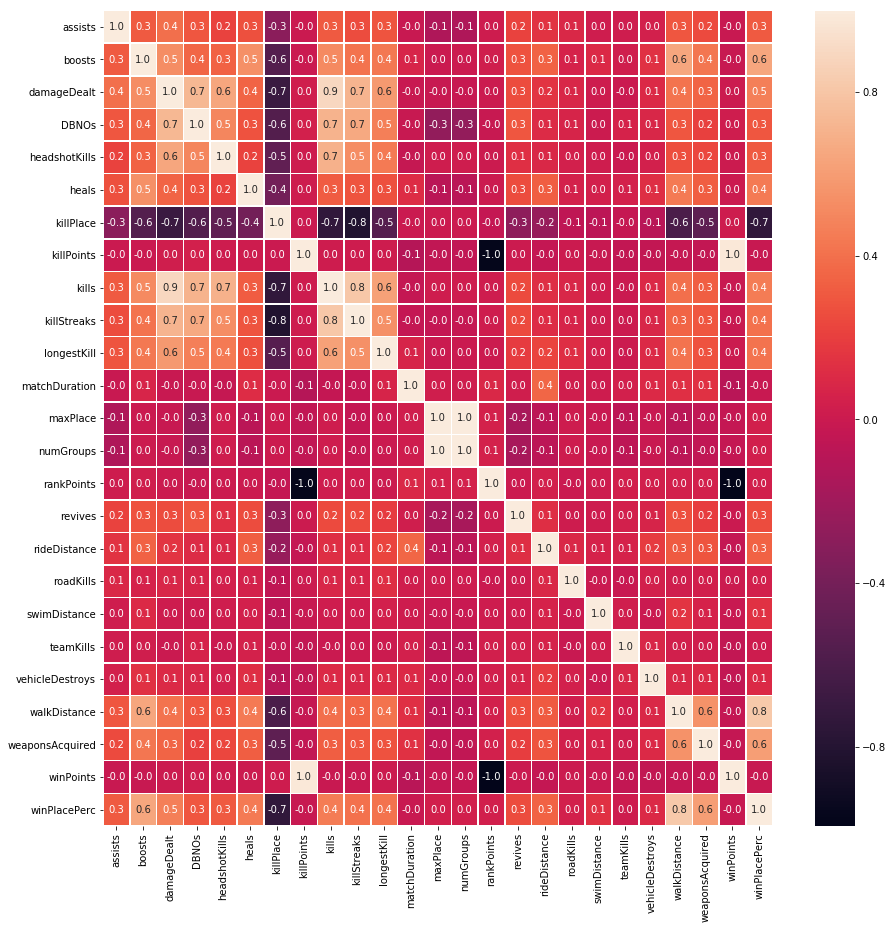

In [41]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

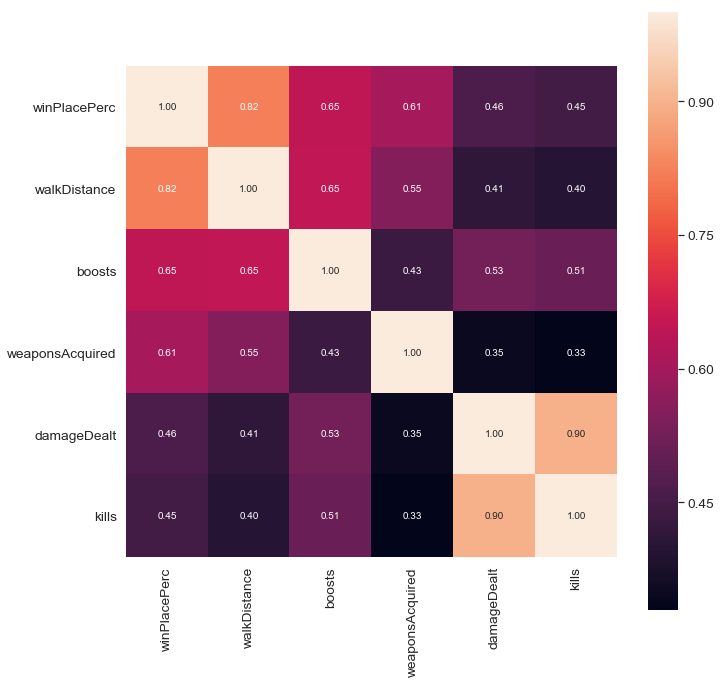

In [46]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

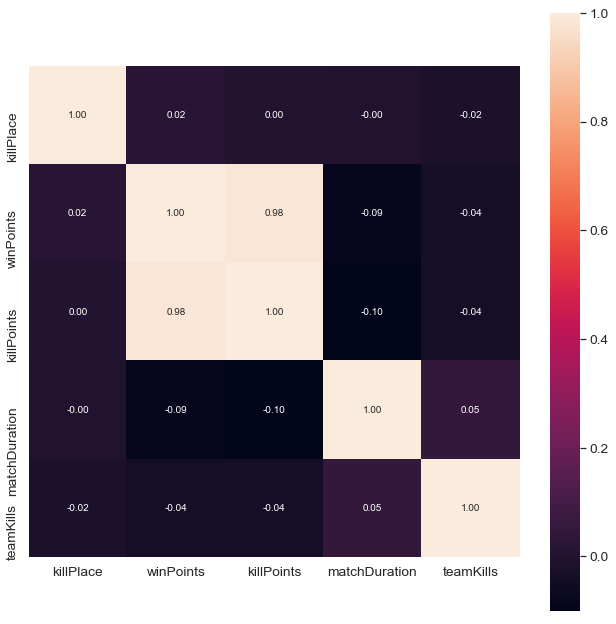

In [45]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nsmallest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

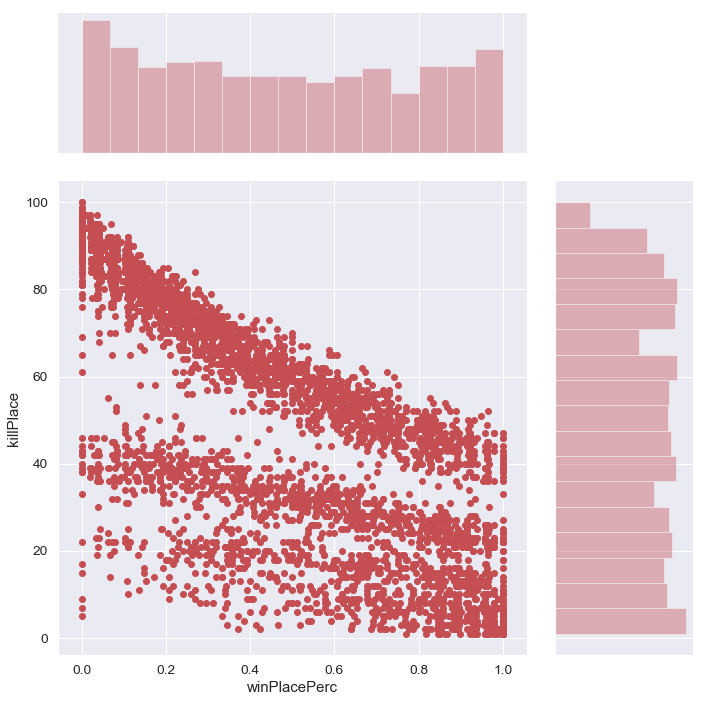

In [48]:
sns.jointplot(x="winPlacePerc", y="killPlace", data=train, height=10, ratio=3, color="r")
plt.show()

In [49]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [50]:
train['boostAndheals'] = train['heals']+train['boosts']

In [51]:
X_train = train[['killPlace','weaponsAcquired','walkDistance','boostAndheals','damageDealt']].values
Y_train = train['winPlacePerc'].values

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [53]:
from sklearn.model_selection import cross_val_score
cvs_rfr = cross_val_score(rfr, X_train, Y_train)
cvs_rfr.mean(), cvs_rfr.std()

(0.8356346679832861, 0.011438930326414968)

In [55]:

rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
X_train.shape
Y_train.shape

(3999,)

In [57]:
X_train.shape

(3999, 5)

In [136]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from keras import optimizers
# from keras.models import load_model
# model = Sequential()
# model.add(Dense(512, kernel_initializer='he_normal', input_dim=X_train.shape[1], activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# # optimizer = optimizers.Adam(lr=0.01, epsilon=1e-8, decay=1e-4, amsgrad=False)
# model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.models import load_model
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# optimizer = optimizers.Adam(lr=0.01, epsilon=1e-8, decay=1e-4, amsgrad=False)
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [59]:
test['boostAndheals'] = test['heals']+test['boosts']

In [60]:
X_test = test[['killPlace','weaponsAcquired','walkDistance','boostAndheals','damageDealt']].values
Y_test = test['winPlacePerc'].values

In [61]:
predictions = rfr.predict(X_test).reshape(-1,1)

In [65]:
dfpredictions = pd.DataFrame(predictions, index=test.index).rename(columns={0:'winPlacePerc'})
dfpredictions.head(15)

,winPlacePerc
0,0.47971
1,0.55118
2,0.07511
3,0.20624
4,0.11874
5,0.07916
6,0.00816
7,0.68713
8,0.43664
9,0.21565


In [73]:
RFmse = 0
for i in range(predictions.shape[0]):
    RFmse = RFmse + (predictions[i][0]-Y_test[i])*(predictions[i][0]-Y_test[i])
RFmse = RFmse/predictions.shape[0]

In [74]:
RFmse

0.01430938005544915

In [78]:
rfr.decision_path(X_test)

(<1002x47038 sparse matrix of type '<type 'numpy.int64'>'
 	with 147830 stored elements in Compressed Sparse Row format>,
 array([    0,  4671,  9304, 14027, 18686, 23357, 28108, 32825, 37500,
        42255, 47038]))

In [79]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [137]:
model.fit(X_train, Y_train, batch_size=10, epochs=5)

Epoch 1/5
3999/3999 [==============================] - 3s 737us/step - loss: 0.0492 - mean_absolute_error: 0.1713
Epoch 2/5
3999/3999 [==============================] - 1s 337us/step - loss: 0.0373 - mean_absolute_error: 0.1513
Epoch 3/5
3999/3999 [==============================] - 1s 341us/step - loss: 0.0332 - mean_absolute_error: 0.1402
Epoch 4/5
3999/3999 [==============================] - 1s 336us/step - loss: 0.0330 - mean_absolute_error: 0.1418
Epoch 5/5
3999/3999 [==============================] - 1s 335us/step - loss: 0.0321 - mean_absolute_error: 0.1391


In [138]:
NNpre = model.predict(X_test)

In [139]:
NNpre.shape

(1002, 1)

In [140]:
NNmse = 0
for i in range(NNpre.shape[0]):
    NNmse = NNmse + (NNpre[i][0]-Y_test[i])*(NNpre[i][0]-Y_test[i])
NNmse = NNmse/NNpre.shape[0]
print (NNmse)

0.02727401074800811


In [110]:
NNpre

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

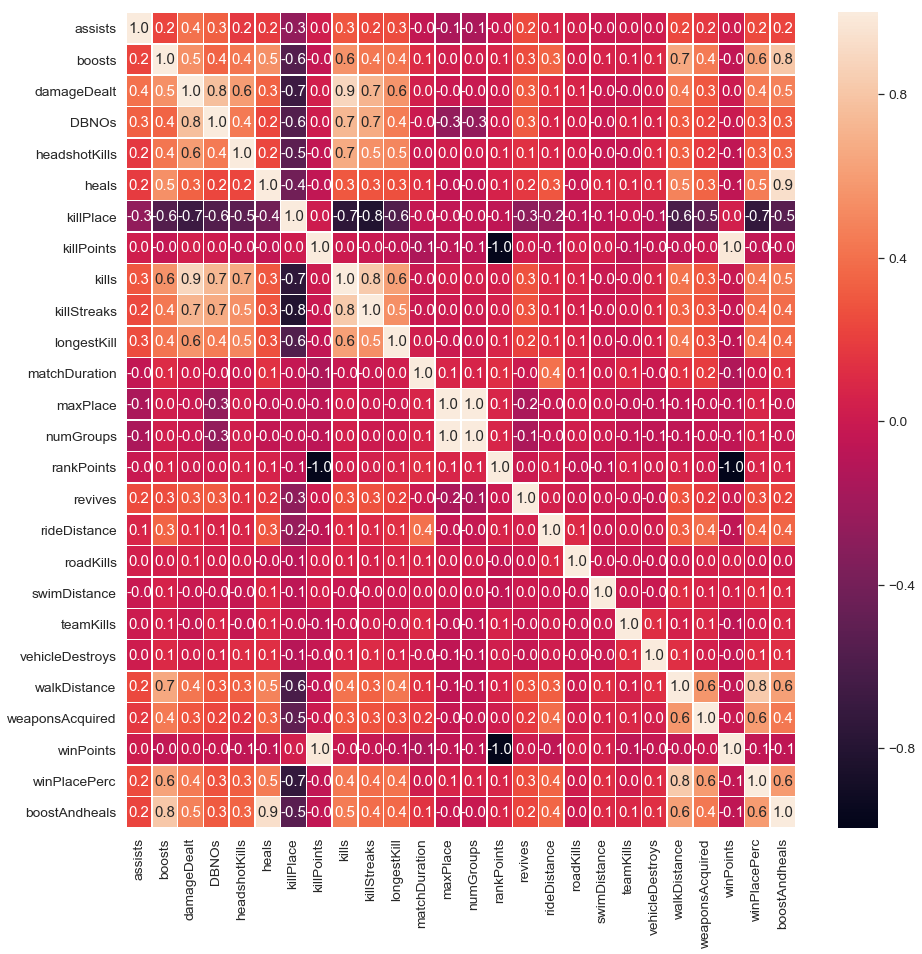

In [141]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()